In [1]:
import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(100)                              # specify number of chips you are using for data
TotalCryo = int(3); Cryocycles = [5,20,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We start at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataCT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'CT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.
                
# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k])) 
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))

print('done')

done


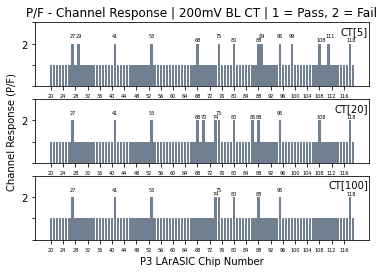

done


In [10]:
chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 2.

# Some ASICs have channel failures that mimic disconnections. Make exemptions.
# Or just manually change any ASICs to P/F if you discover something.
PFchips[48][0] = 2.; PFchips[48][1] = 2.
PFchips[57][2] = 1.
                
fig, (a,b,c) = plt.subplots(3)
for i in range(len(PF)):
    a.bar(chip[i],PFchips[i][0],color='slategrey')
    b.bar(chip[i],PFchips[i][1],color='slategrey')
    c.bar(chip[i],PFchips[i][2],color='slategrey')
    # Need to stagger the numbers for CT failures, since the numbers overlap is chips fail 'close by'
    if (i % 2) == 0:
        if PFchips[i][0] == 2.:
            a.text(chip[i]-1,2.1,chip[i],size=5)#,rotation='vertical')
        if PFchips[i][1] == 2.:
            b.text(chip[i]-1,2.1,chip[i],size=5)#,rotation='vertical')
        if PFchips[i][2] == 2.:
            c.text(chip[i]-1,2.1,chip[i],size=5)#,rotation='vertical')
    else:
        if PFchips[i][0] == 2.:
            a.text(chip[i]-1,2.3,chip[i],size=5)#,rotation='vertical')
        if PFchips[i][1] == 2.:
            b.text(chip[i]-1,2.3,chip[i],size=5)#,rotation='vertical')
        if PFchips[i][2] == 2.:
            c.text(chip[i]-1,2.3,chip[i],size=5)#,rotation='vertical')
    
a.set_xticks(range(20,len(chip)+20,4)); b.set_xticks(range(20,len(chip)+20,4)); c.set_xticks(range(20,len(chip)+20,4))
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5); c.tick_params(axis = 'x', labelsize=5)

for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)

a.set_ylim([0,3.0]); b.set_ylim([0,3.0]); c.set_ylim([0,3.0])
a.set_title('P/F - Channel Response | 200mV BL CT | 1 = Pass, 2 = Fail')
b.set_ylabel('Channel Response (P/F)')
c.set_xlabel('P3 LArASIC Chip Number')
a.text(len(chips)+15,2.45,'CT[5]',size=10)
b.text(len(chips)+13,2.45,'CT[20]',size=10)
c.text(len(chips)+11,2.45,'CT[100]',size=10)

path = '../../../../test.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')

CT[5] 27
CT[20] 27
CT[100] 27
CT[5] 29
CT[5] 41
CT[20] 41
CT[100] 41
CT[5] 53
CT[20] 53
CT[100] 53
CT[5] 68
CT[20] 68
CT[20] 70
CT[20] 74
CT[100] 74
CT[5] 75
CT[20] 75
CT[100] 75
CT[100] 77
CT[5] 80
CT[20] 80
CT[100] 80
CT[20] 86
CT[5] 88
CT[20] 88
CT[100] 88
CT[5] 89
CT[5] 95
CT[20] 95
CT[100] 95
CT[5] 99
CT[5] 108
CT[20] 108
CT[5] 111
CT[5] 118
CT[20] 118
CT[100] 118


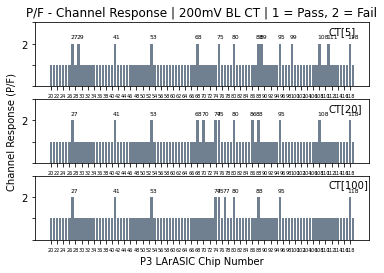

done


In [2]:
### for 50 ASICs ###

# Thanks to CE talk (12/6/21) by H. Chen (DUNE TPC Electronics Consortium Meeting) for plot idea

chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
# Designate y-values either 1 or 2 (ASIC Passes or Fails for all channels)
for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
            # Exclude Disconnections (6000 adc)
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 2.

# Some ASICs have channel failures that mimic disconnections. Make exemptions.
# Or just manually change any ASICs to P/F if you discover something.
PFchips[48][0] = 2.; PFchips[48][1] = 2.

# Create bar plots for each Cryocycle
fig, (a,b,c) = plt.subplots(3)
for i in range(len(chips)):
    a.bar(chip[i],PFchips[i][0],color='slategrey')
    b.bar(chip[i],PFchips[i][1],color='slategrey')
    c.bar(chip[i],PFchips[i][2],color='slategrey')
    if PFchips[i][0] == 2.:
        a.text(chip[i]-.75,2.25,chip[i],size=6)
        print('CT[5] ' + str(chip[i]))
    if PFchips[i][1] == 2.:
        b.text(chip[i]-.75,2.25,chip[i],size=6)
        print('CT[20] ' + str(chip[i]))
    if PFchips[i][2] == 2.:
        c.text(chip[i]-.75,2.25,chip[i],size=6)
        print('CT[100] ' + str(chip[i]))
    
# setting x-ticks for all the ASICs - too many for each one, so only label every 4
a.set_xticks(range(20,len(chip)+20,2)); b.set_xticks(range(20,len(chip)+20,2));
c.set_xticks(range(20,len(chip)+20,2))
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5);
c.tick_params(axis = 'x', labelsize=5)

# Y-axis tick marks -- only displaying the '2' value
for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)

a.set_ylim([0,3.0]); b.set_ylim([0,3.0]); c.set_ylim([0,3.0])
a.set_title('P/F - Channel Response | 200mV BL CT | 1 = Pass, 2 = Fail')
b.set_ylabel('Channel Response (P/F)')
c.set_xlabel('P3 LArASIC Chip Number')
a.text(len(chips)+11,2.45,'CT[5]',size=10)
b.text(len(chips)+11,2.45,'CT[20]',size=10)
c.text(len(chips)+11,2.45,'CT[100]',size=10)

path = '../../../../CT Channel Response.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')

## Displaying all 1600 channels

27[0] Ch0
27[0] Ch1
27[0] Ch2
27[0] Ch3
27[0] Ch4
27[0] Ch5
27[0] Ch6
27[0] Ch7
27[0] Ch8
27[0] Ch9
27[0] Ch10
27[0] Ch11
27[0] Ch12
27[0] Ch13
27[0] Ch14
27[0] Ch15
29[0] Ch1
41[0] Ch0
41[0] Ch1
41[0] Ch2
41[0] Ch3
41[0] Ch4
41[0] Ch5
41[0] Ch6
41[0] Ch7
41[0] Ch8
41[0] Ch9
41[0] Ch10
41[0] Ch11
41[0] Ch12
41[0] Ch13
41[0] Ch14
41[0] Ch15
53[0] Ch0
53[0] Ch1
53[0] Ch2
53[0] Ch3
53[0] Ch4
53[0] Ch5
53[0] Ch6
53[0] Ch7
53[0] Ch8
53[0] Ch9
53[0] Ch10
53[0] Ch11
53[0] Ch12
53[0] Ch13
53[0] Ch14
53[0] Ch15
75[0] Ch0
75[0] Ch1
75[0] Ch2
75[0] Ch3
75[0] Ch4
75[0] Ch5
75[0] Ch6
75[0] Ch7
75[0] Ch8
75[0] Ch9
75[0] Ch10
75[0] Ch11
75[0] Ch12
75[0] Ch13
75[0] Ch14
75[0] Ch15
80[0] Ch0
80[0] Ch1
80[0] Ch2
80[0] Ch3
80[0] Ch4
80[0] Ch5
80[0] Ch6
80[0] Ch7
80[0] Ch8
80[0] Ch9
80[0] Ch10
80[0] Ch11
80[0] Ch12
80[0] Ch13
80[0] Ch14
80[0] Ch15
88[0] Ch0
88[0] Ch1
88[0] Ch2
88[0] Ch3
88[0] Ch5
88[0] Ch6
88[0] Ch7
88[0] Ch8
88[0] Ch9
88[0] Ch10
88[0] Ch11
88[0] Ch12
88[0] Ch13
88[0] Ch14
88[0] Ch15
89[0

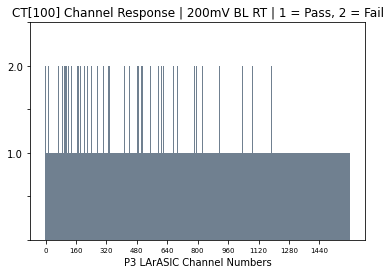

done


In [11]:
from tqdm.notebook import trange, tqdm      # progress bar

ChaCha = []  # channels
PFchannels = np.ones((len(Cryocycles),1600))
for i in range(0,1600):
    ChaCha.append(i)
    
# Designate y-values either 1 or 2 (ASIC Passes or Fails for all channels)
for c in range(len(Cryocycles)):
    for i in range(0,100):
        for j in range(0,16):
        # Exclude Disconnections (6000 adc)
            if PF[i][c][j] == 1. and (Mean[i][c][j] > 6250. or Mean[i][c][j] < 5750.):
                PFchannels[c][j+(j*i)] = 2.
                print(str(i+20) + '[' + str(c) + '] Ch' + str(j))

# Create bar plots --- This one is only for comparison between RT[0] and RT[100]
fig, (a) = plt.subplots(1)
a.bar(ChaCha,PFchannels[2],color='slategrey',width=2)
    
# setting x-ticks for all the ASICs - too many for each one, so only label every 4
a.set_xticks(range(0,1600,160))
a.tick_params(axis = 'x', labelsize=7)

# Y-axis tick marks -- only displaying the '2' value
for n, label in enumerate(a.yaxis.get_ticklabels()):
    label.set_visible(False)
    if n == 2. or n == 4.:   # Tick marks denoted by how many there are (n = 2 is y = 1.0, n = 4 is y = 2.0)
        label.set_visible(True)

a.set_ylim([0,2.5])
a.set_title('CT[100] Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
#a.set_ylabel('Channel Response (P/F)')
a.set_xlabel('P3 LArASIC Channel Numbers')
#a.text(100,2.35,'RT[100]',size=10)

path = '../../../../CT[100] Channel Response - all channels.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')